# part 2: Virtualisation of country and country language datasets

In [1]:
# import the neccessary libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: Display the distribution of the gross national product of each continent among different countries

In [2]:
# load the country dataset
country_df = pd.read_csv('country.csv')
country_df.head()

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gross_national_product,gross_national_product_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [3]:
# create a continent list
continent = country_df['continent'].drop_duplicates().to_list()
continent.sort()

In [4]:
# define a function to draw a graph
def gnp_distribution(cont):
    try:
        cont_df = country_df.loc[country_df['continent'] == cont, ['name', 'gross_national_product']]
        plt.figure(figsize=(15,5))
        ax = sns.barplot(data=cont_df, x='name',  y='gross_national_product')
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
        ax.set(ylim=0)
        plt.xlabel('')
        plt.title('Distribution of gross national product in ' + cont, fontsize=16)
    except:
        print('please input a string containing a continent name')

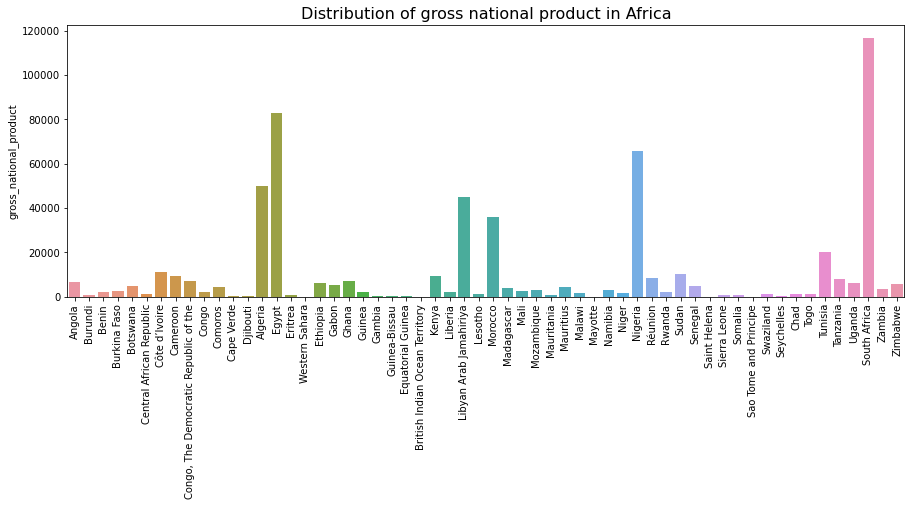

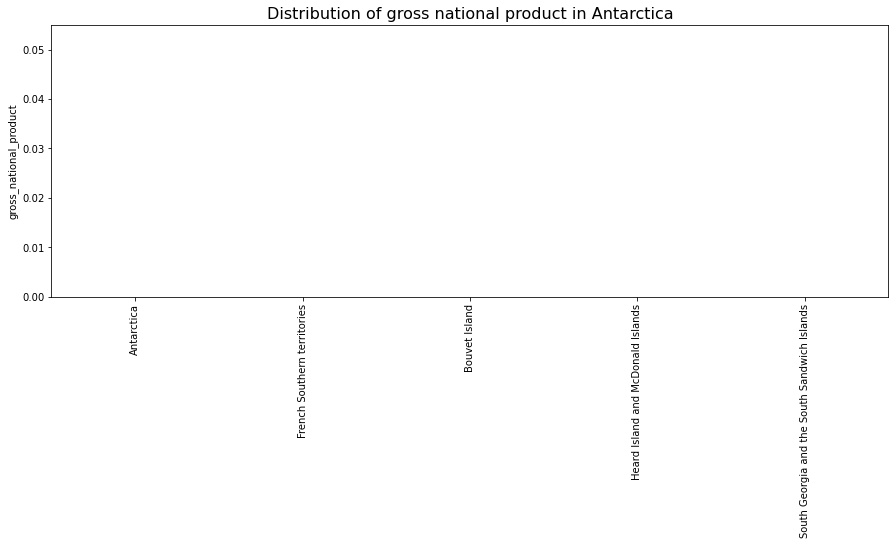

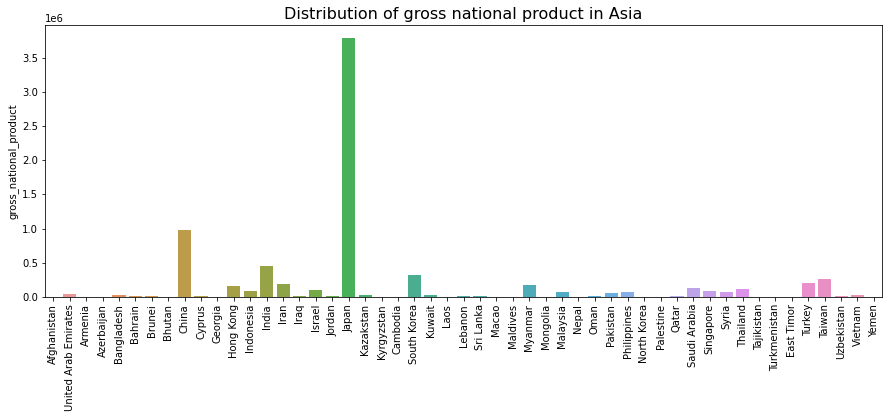

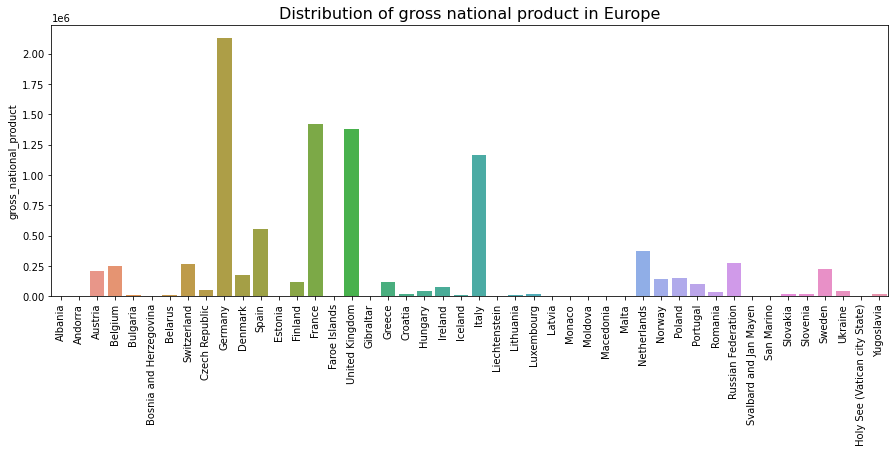

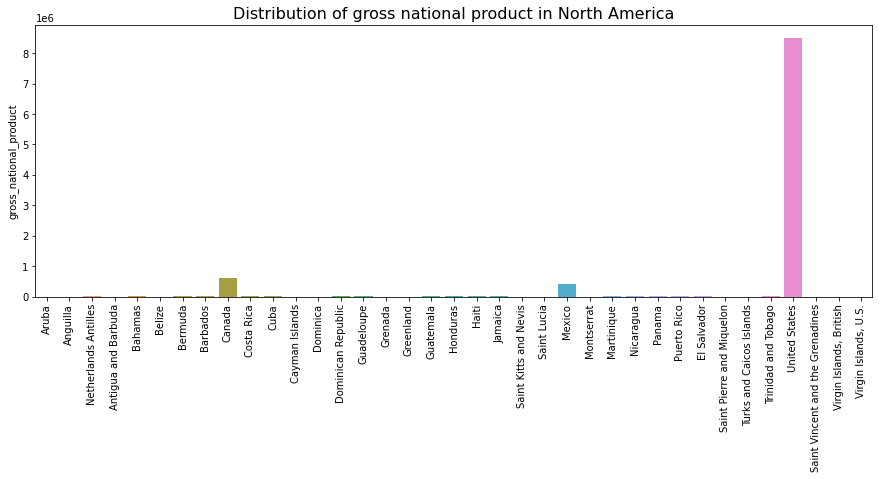

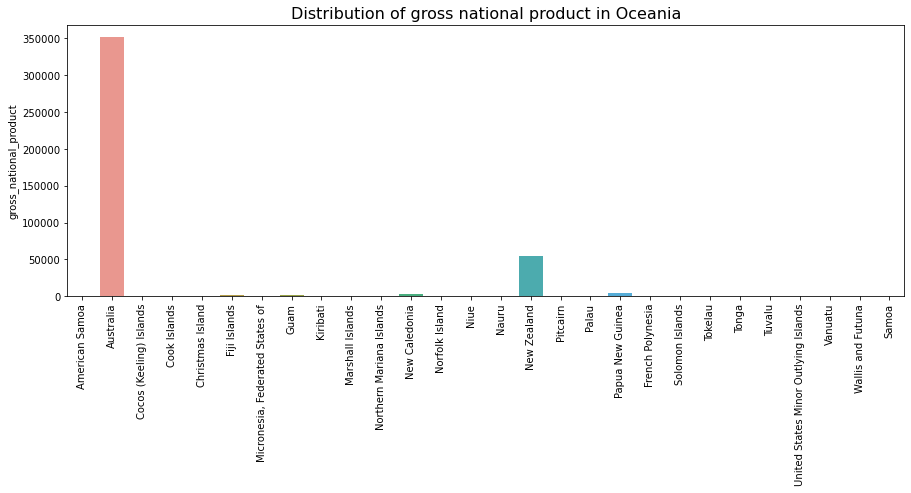

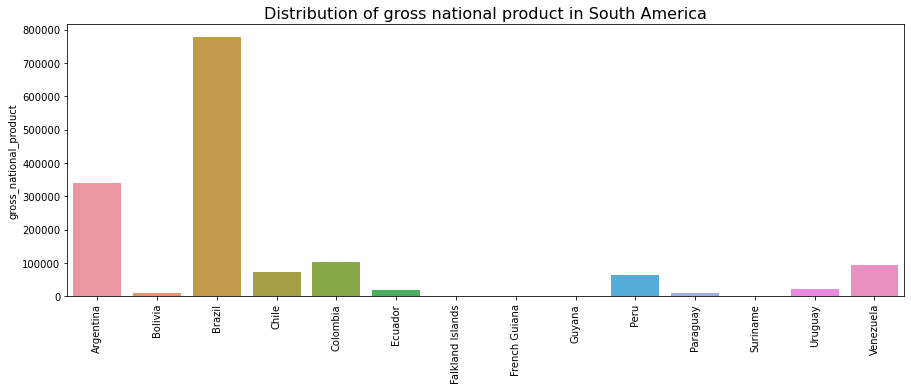

In [5]:
# draw the graphs
for i in continent:
    gnp_distribution(i)

### Question 2: Display the top 10 languages as measured by the number of countries in which they are recognised as an official language

In [6]:
# load the country language dataset
language_df = pd.read_csv('country_language.csv')
language_df.head()

,country_code,language,is_official,percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [7]:
# create a top 10 list
top10_df = language_df.loc[language_df['is_official'] == 'T', ['country_code', 'language']]
top10_df = top10_df.groupby(by=['language']).count()
top10_df = top10_df.sort_values(by=['country_code'], ascending=False)
top10_df = top10_df.iloc[0:10]
top10_df

,country_code
language,
English,44
Arabic,22
Spanish,20
French,18
German,6
Portuguese,6
Dutch,4
Malay,4
Italian,4


Text(0.5, 1.0, 'Top 10 official languages by number of countries')

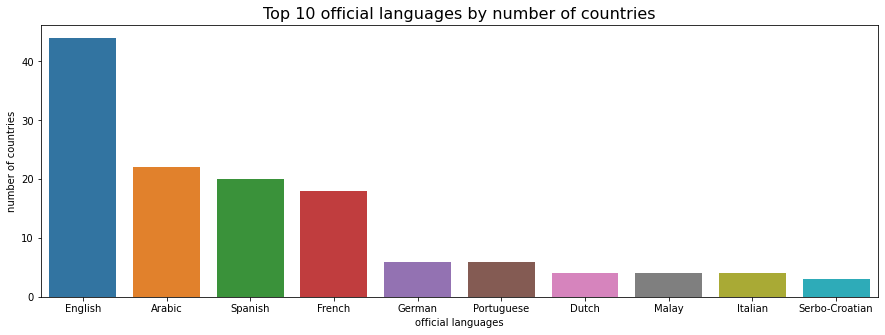

In [12]:
# plot the top 10 list
plt.figure(figsize=(15,5))
sns.barplot(data=top10_df, x=top10_df.index, y='country_code')
plt.xlabel('official languages')
plt.ylabel('number of countries')
plt.title('Top 10 official languages by number of countries', fontsize=16)